In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression

## Import Data

In [2]:
carData = pd.read_csv('SG_usedcar.csv')
carData.head()

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price
0,BMW 5 Series 520i Highline,Luxury Sedan,28-May-13,1yr 11mths 21days COE left),15920,N.A,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800
2,MINI One 1.6A (New 10-yr COE),Hatchback,7-Oct-11,10yrs COE left),6280,110000,742,N.A,N.A,1598,1100,2011,Auto,18180,18180,72,3,62800
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,12-Feb-09,7yrs 8mths 5days COE left),N.A,N.A,959,N.A,25727,1591,1264,2009,Auto,10763,10763,89,3,N.A
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,28-Dec-07,1yr 6mths 21days COE left),8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800


In [3]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4411 non-null   object
 1   Type           4411 non-null   object
 2   Reg_date       4411 non-null   object
 3   Coe_left       4389 non-null   object
 4   Dep            4411 non-null   object
 5   Mileage        4411 non-null   object
 6   Road Tax       4411 non-null   object
 7   Dereg Value    4411 non-null   object
 8   COE            4411 non-null   object
 9   Engine Cap     4411 non-null   object
 10  Curb Weight    4411 non-null   object
 11  Manufactured   4411 non-null   object
 12  Transmission   4411 non-null   object
 13  OMV            4411 non-null   object
 14  ARF            4411 non-null   object
 15  Power          4411 non-null   object
 16  No. of Owners  4411 non-null   object
 17  Price          4411 non-null   object
dtypes: object(18)
memory usage: 

## Change N.A to nan

In [4]:
carData = carData.replace('N.A',np.nan)
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4411 non-null   object
 1   Type           4411 non-null   object
 2   Reg_date       4411 non-null   object
 3   Coe_left       4389 non-null   object
 4   Dep            3703 non-null   object
 5   Mileage        2851 non-null   object
 6   Road Tax       3983 non-null   object
 7   Dereg Value    3446 non-null   object
 8   COE            4152 non-null   object
 9   Engine Cap     4408 non-null   object
 10  Curb Weight    4331 non-null   object
 11  Manufactured   4391 non-null   object
 12  Transmission   4411 non-null   object
 13  OMV            3993 non-null   object
 14  ARF            4398 non-null   object
 15  Power          4388 non-null   object
 16  No. of Owners  4339 non-null   object
 17  Price          3676 non-null   object
dtypes: object(18)
memory usage: 

## Removing missing values

In [5]:
carData.dropna(subset=['Price'], inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 4410
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          3676 non-null   object
 1   Type           3676 non-null   object
 2   Reg_date       3676 non-null   object
 3   Coe_left       3670 non-null   object
 4   Dep            3676 non-null   object
 5   Mileage        2830 non-null   object
 6   Road Tax       3280 non-null   object
 7   Dereg Value    3434 non-null   object
 8   COE            3446 non-null   object
 9   Engine Cap     3673 non-null   object
 10  Curb Weight    3616 non-null   object
 11  Manufactured   3671 non-null   object
 12  Transmission   3676 non-null   object
 13  OMV            3288 non-null   object
 14  ARF            3673 non-null   object
 15  Power          3669 non-null   object
 16  No. of Owners  3627 non-null   object
 17  Price          3676 non-null   object
dtypes: object(18)
memory usage: 545.7

In [6]:
carData.fillna(0, inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 4410
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          3676 non-null   object
 1   Type           3676 non-null   object
 2   Reg_date       3676 non-null   object
 3   Coe_left       3676 non-null   object
 4   Dep            3676 non-null   object
 5   Mileage        3676 non-null   object
 6   Road Tax       3676 non-null   object
 7   Dereg Value    3676 non-null   object
 8   COE            3676 non-null   object
 9   Engine Cap     3676 non-null   object
 10  Curb Weight    3676 non-null   object
 11  Manufactured   3676 non-null   object
 12  Transmission   3676 non-null   object
 13  OMV            3676 non-null   object
 14  ARF            3676 non-null   object
 15  Power          3676 non-null   object
 16  No. of Owners  3676 non-null   object
 17  Price          3676 non-null   object
dtypes: object(18)
memory usage: 545.7

In [7]:
convert_dict = {'Mileage': 'int64','Road Tax': 'int64','COE': 'int64','OMV': 'int64','ARF': 'int64', 'Manufactured': 'int64','No. of Owners': 'int64','Price': 'int64','Dereg Value':'int64','Engine Cap':'int64','Curb Weight':'int64','Power':'int64','Type':'category'}

In [8]:
carData = carData.astype(convert_dict)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 4410
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Brand          3676 non-null   object  
 1   Type           3676 non-null   category
 2   Reg_date       3676 non-null   object  
 3   Coe_left       3676 non-null   object  
 4   Dep            3676 non-null   object  
 5   Mileage        3676 non-null   int64   
 6   Road Tax       3676 non-null   int64   
 7   Dereg Value    3676 non-null   int64   
 8   COE            3676 non-null   int64   
 9   Engine Cap     3676 non-null   int64   
 10  Curb Weight    3676 non-null   int64   
 11  Manufactured   3676 non-null   int64   
 12  Transmission   3676 non-null   object  
 13  OMV            3676 non-null   int64   
 14  ARF            3676 non-null   int64   
 15  Power          3676 non-null   int64   
 16  No. of Owners  3676 non-null   int64   
 17  Price          3676 non-null   int64  

# Basic Statistics


In [9]:
mileage = pd.DataFrame(carData['Mileage'])
dereg = pd.DataFrame(carData['Dereg Value'])
price = pd.DataFrame(carData['Price'])

newDF = pd.DataFrame(carData[["Mileage", "Dereg Value", "Price"]])

<Axes: >

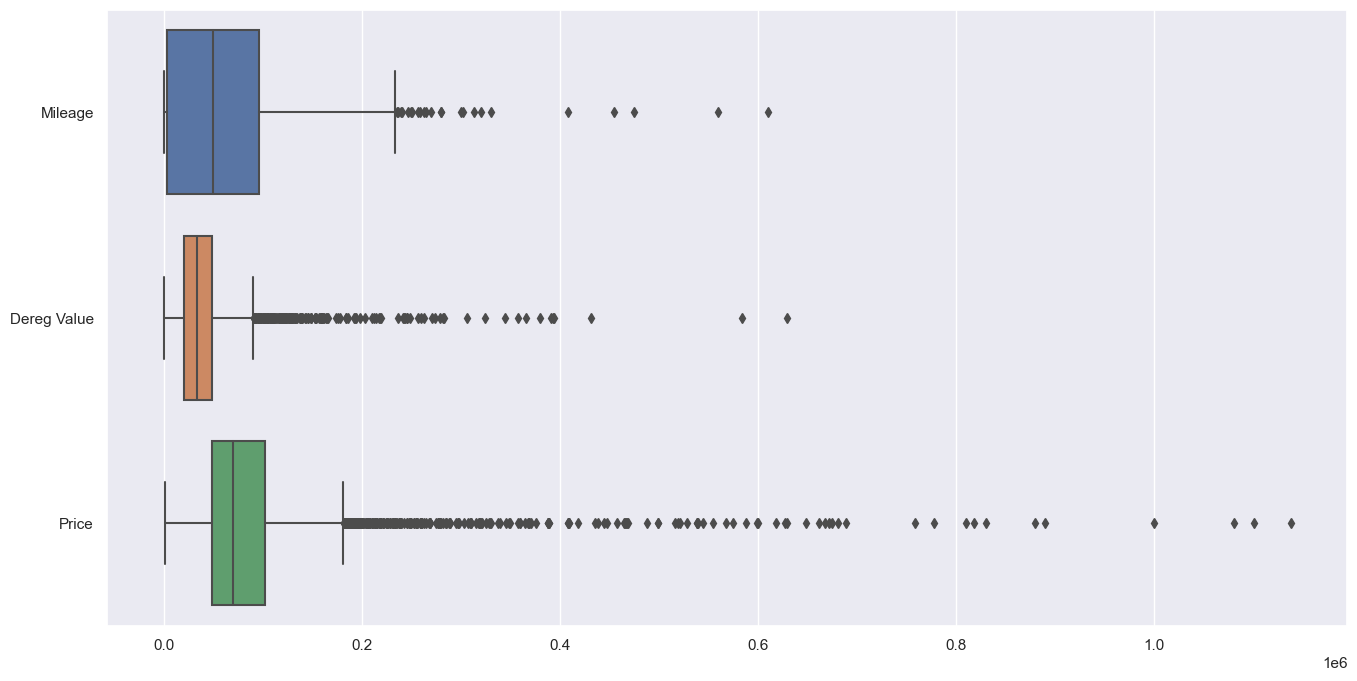

In [10]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = newDF, orient = "h")

In [11]:
mileage.describe()


,Mileage
count,3676.000000
mean,59307.161045
std,57735.597579
min,0.000000
25%,3777.000000
50%,50000.000000
75%,96000.000000
max,610000.000000


In [12]:
dereg.describe()

,Dereg Value
count,3676.000000
mean,39314.488303
std,38307.593150
min,0.000000
25%,20723.750000
50%,33797.000000
75%,48707.500000
max,629526.000000


In [13]:
price.describe()

,Price
count,3.676000e+03
mean,8.955960e+04
std,8.730654e+04
min,1.800000e+03
25%,4.880000e+04
50%,6.980000e+04
75%,1.018000e+05
max,1.138000e+06


In [14]:
milpriceDF = pd.concat([mileage, price], axis = 1).reindex(price.index)
milpriceDF

,Mileage,Price
0,0,54000
1,50000,49800
2,110000,62800
4,203000,12800
5,21000,259988
...,...,...
4406,127000,52828
4407,40200,65800
4408,0,17800
4409,120000,50800


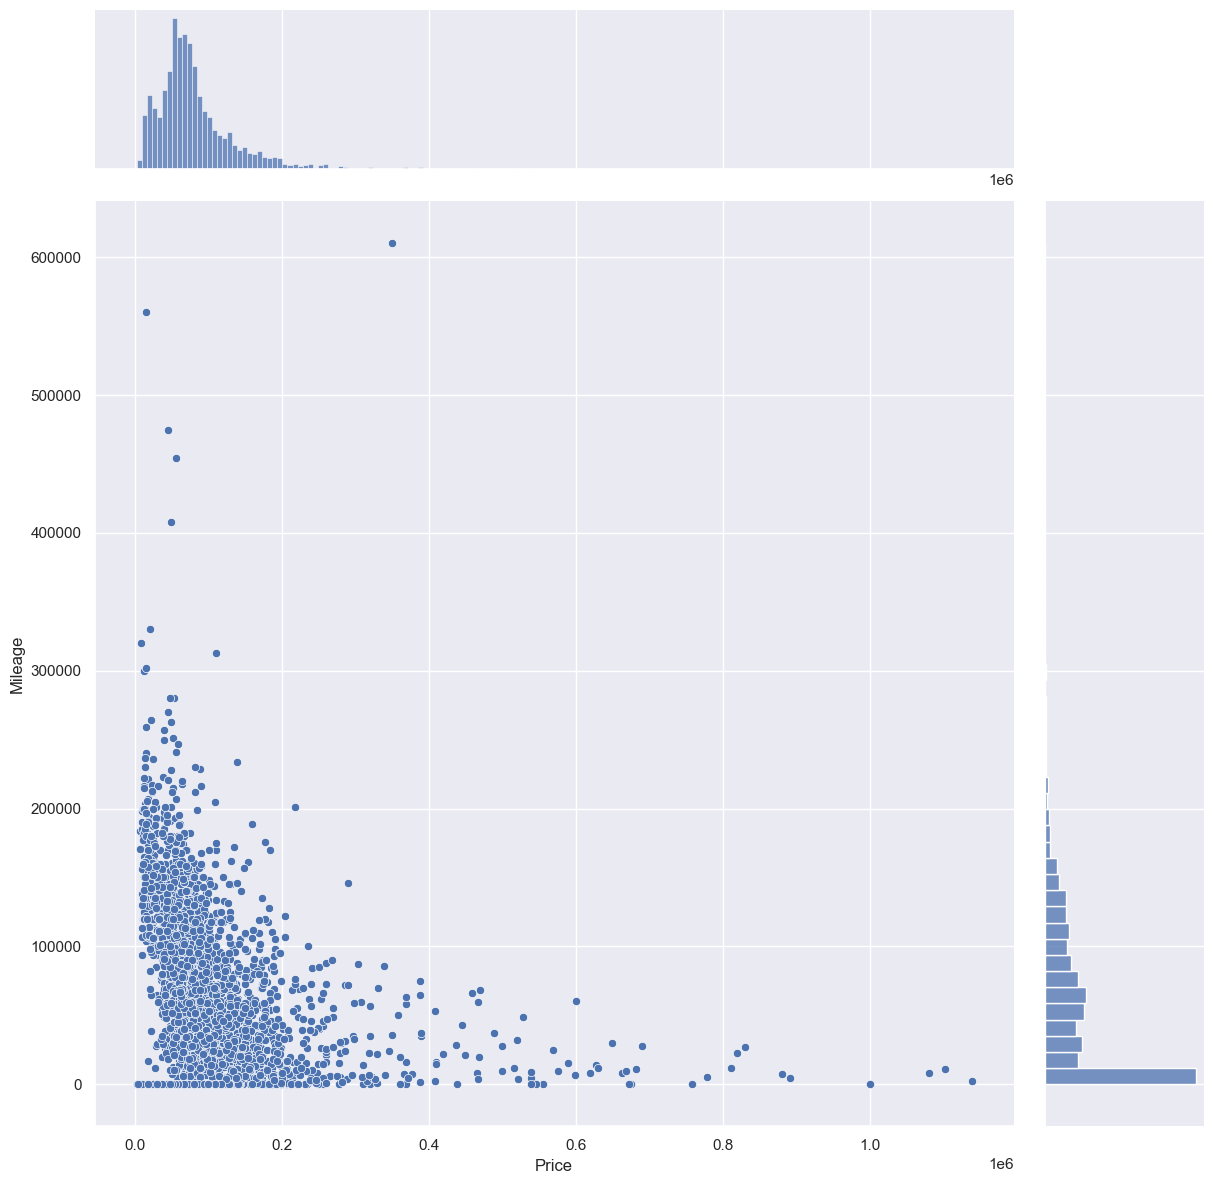

In [15]:
sb.jointplot(data = milpriceDF, x = "Price", y = "Mileage", height = 12)

In [16]:
deregpriceDF = pd.concat([dereg, price], axis = 1).reindex(dereg.index)
deregpriceDF

,Dereg Value,Price
0,38133,54000
1,31237,49800
2,0,62800
4,6656,12800
5,106829,259988
...,...,...
4406,35772,52828
4407,35419,65800
4408,3269,17800
4409,39265,50800


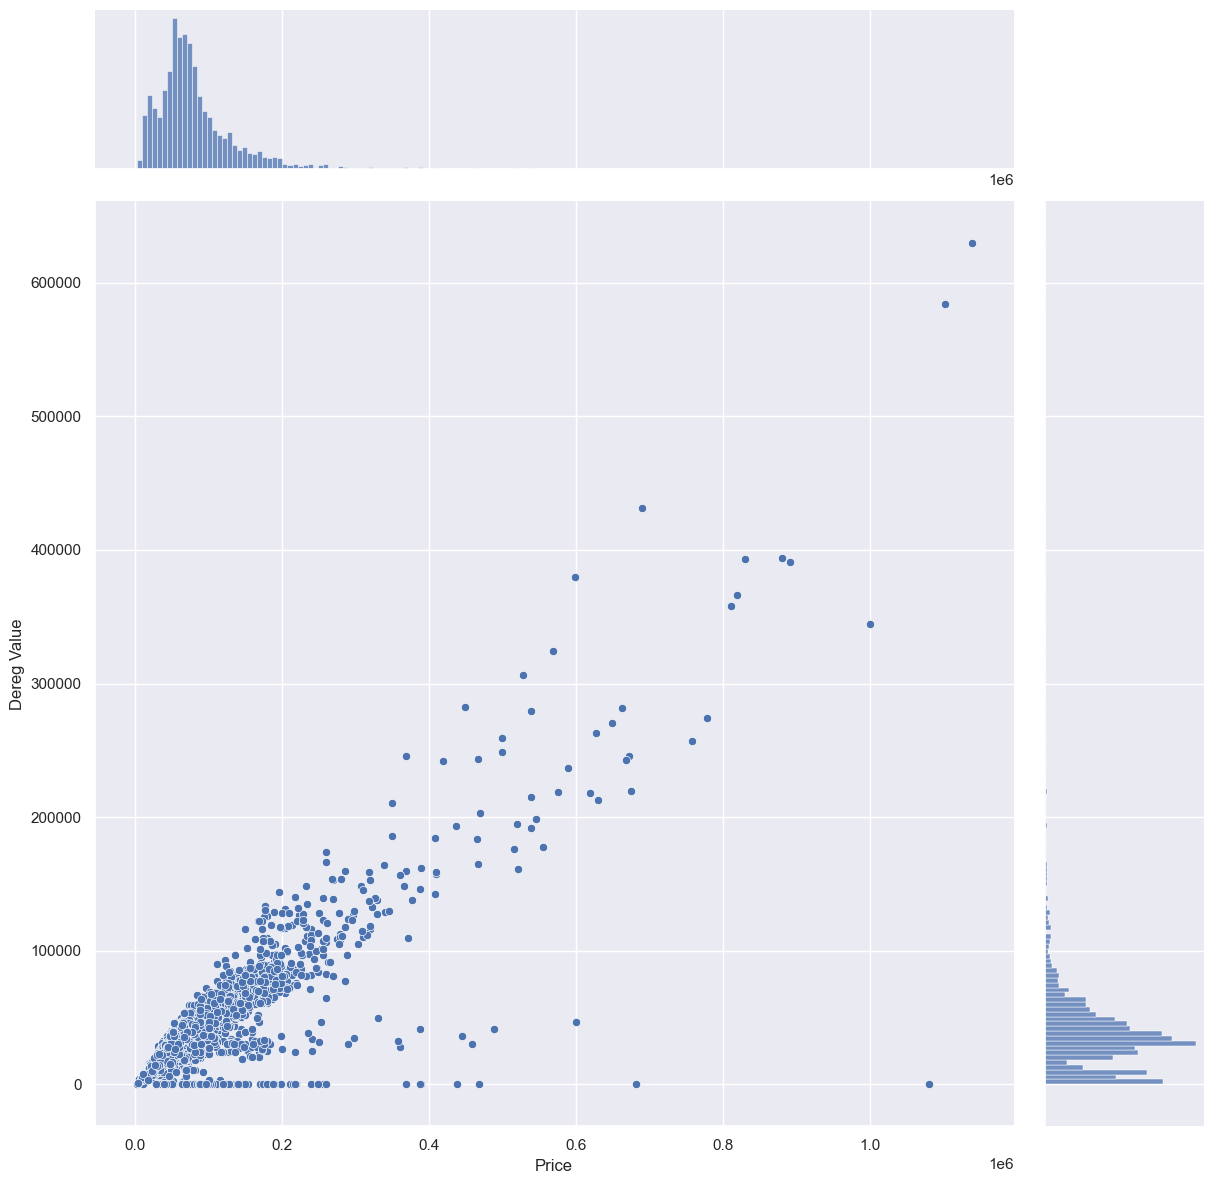

In [17]:
sb.jointplot(data = deregpriceDF, x = "Price", y = "Dereg Value", height = 12)

In [18]:
deregpriceDF.corr()

,Dereg Value,Price
Dereg Value,1.000000,0.835856
Price,0.835856,1.000000


In [19]:
milpriceDF.corr()

,Mileage,Price
Mileage,1.000000,-0.181667
Price,-0.181667,1.000000


<Axes: >

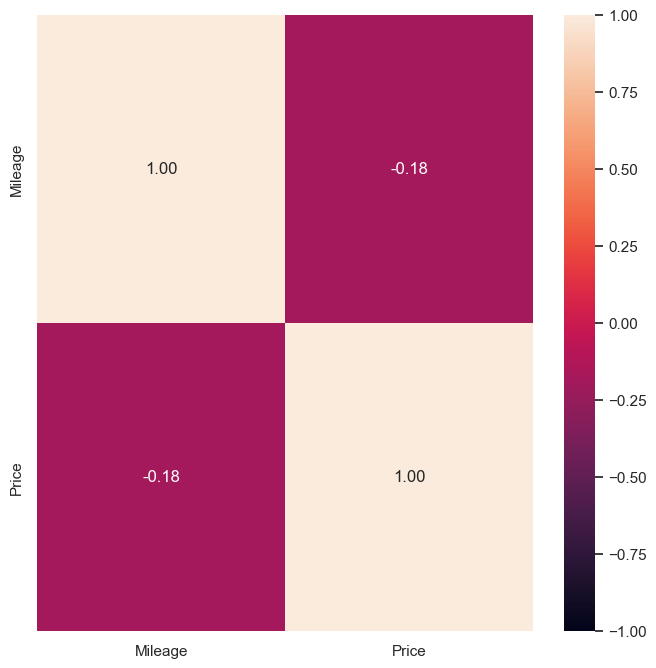

In [20]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(milpriceDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

<Axes: >

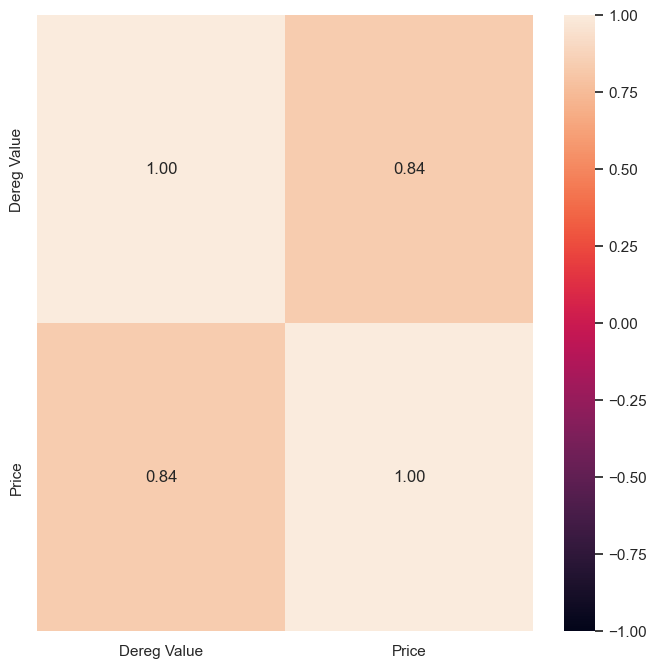

In [21]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(deregpriceDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [24]:
# Splitting the dataset into train and test sets
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(mileage, price, test_size=0.25, random_state=42)


Intercept of Regression 	: b =  12740.70322767213
Coefficients of Regression 	: a =  [1.95072563]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7243601384528118
Mean Squared Error (MSE) 	: 2075757616.7703476

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6233611549011349
Mean Squared Error (MSE) 	: 2970463874.889585



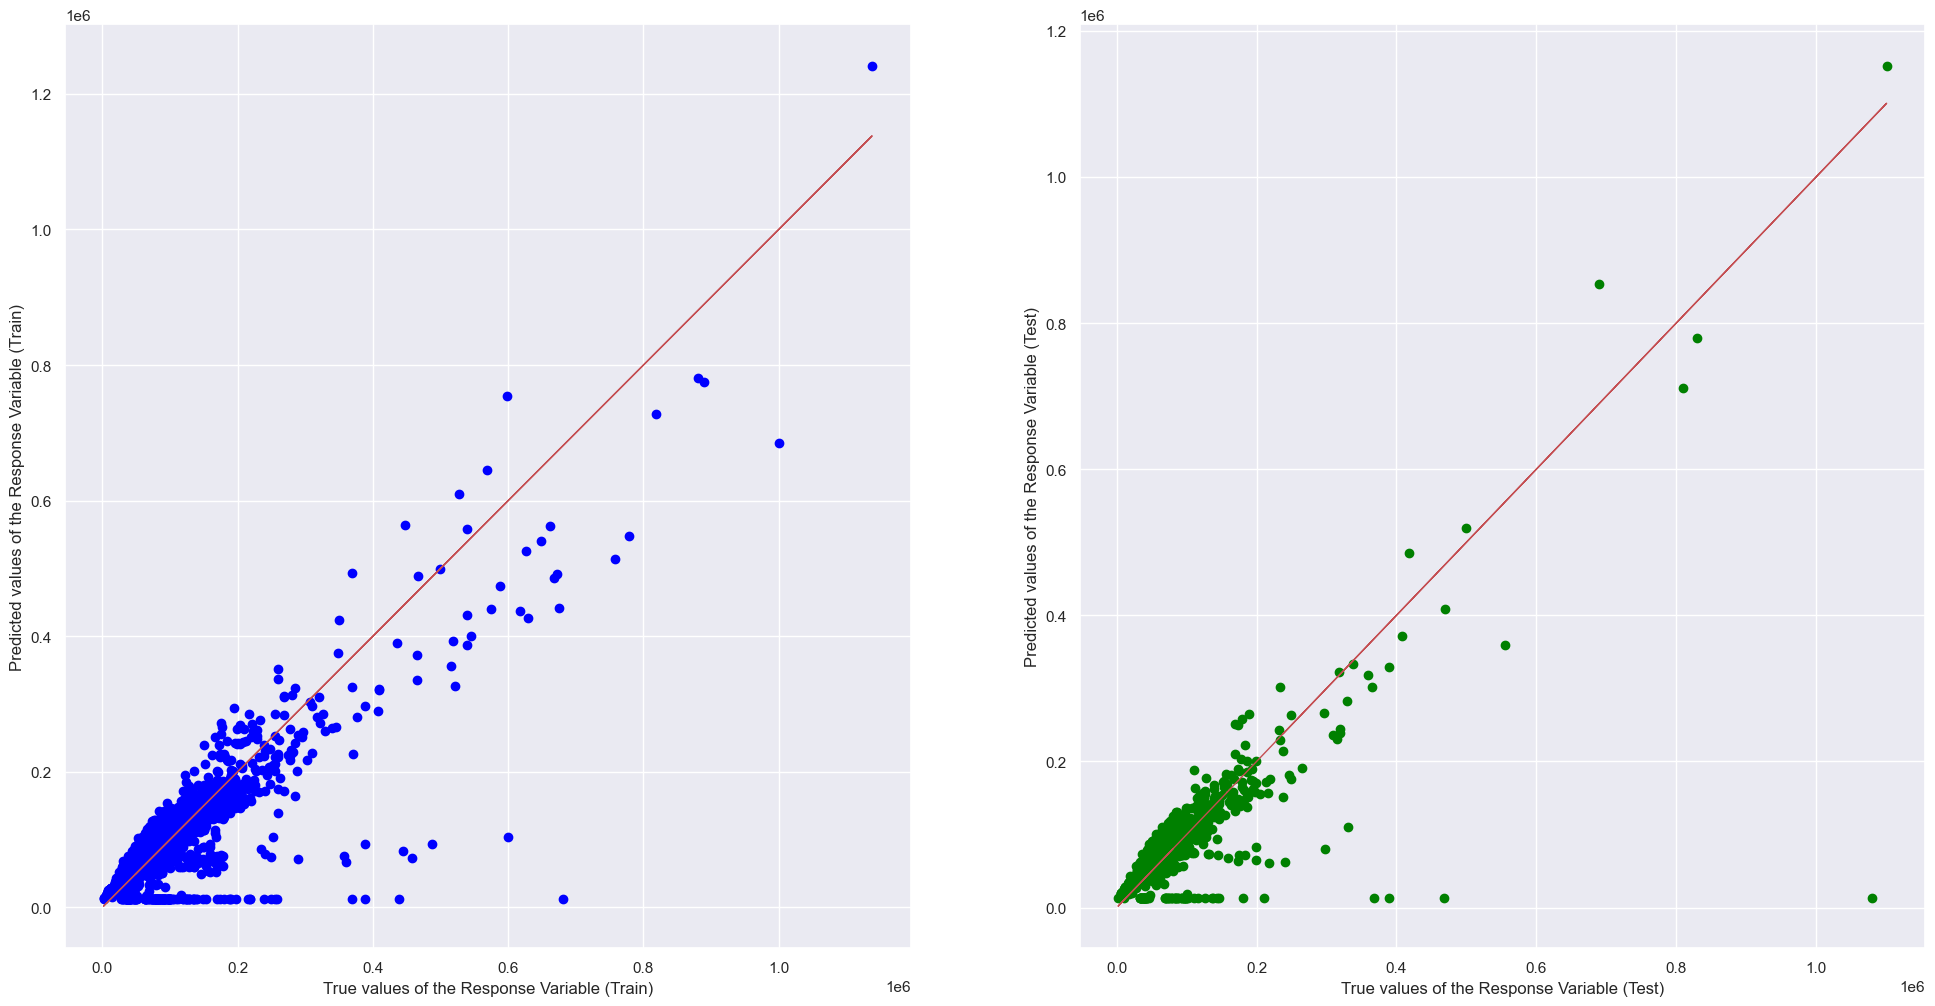

In [36]:
#For mileage VS Price
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Goodness of Fit of Model on Train Dataset
Explained Variance (R^2): 0.7243601384528118
Mean Squared Error (MSE): 2075757616.7703476

Goodness of Fit of Model on Test Dataset
Explained Variance (R^2): 0.6233611549011349
Mean Squared Error (MSE): 2970463874.889585



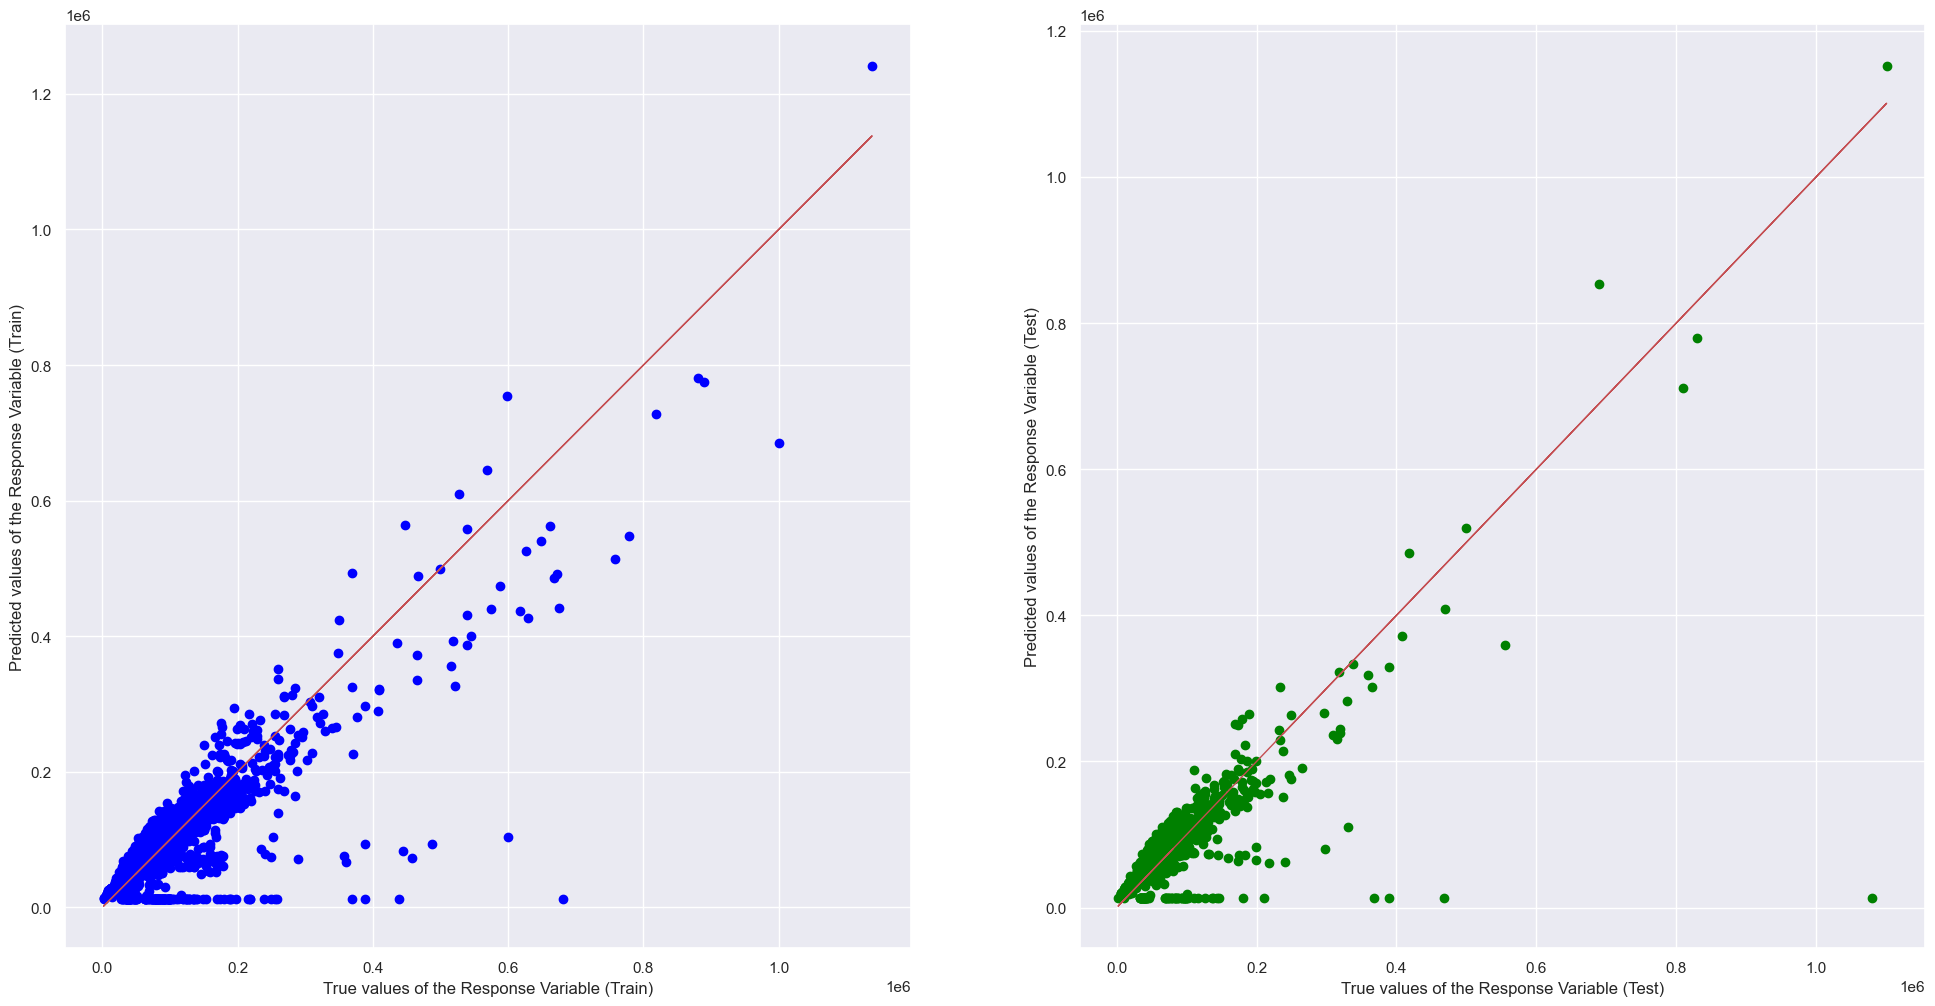

In [37]:
# Assuming your dataset contains features 'DeregValue' and 'Price'
X = carData[['Dereg Value']]  # Predictor variable
y = carData['Price']  # Response variable

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Linear Regression using Train Data
linreg = LinearRegression()  # create the linear regression object
linreg.fit(X_train, y_train)  # train the linear regression model

# Predict values corresponding to DeregValue
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model on Train Dataset")
print("Explained Variance (R^2):", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model on Test Dataset")
print("Explained Variance (R^2):", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()
